<h3> <b>Name:</b> Muahammad Aleem Javed </h3>
<h3> <b>Roll Number:</b> 18L-1879 </h3>
<h5> Python 3.6.6 | Anaconda Environment </h5>

In [1]:
import time

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import TensorBoard
from keras import backend as K

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [2]:
%matplotlib inline

<h2>Parameters Setting</h2>

In [3]:
batch_size = 128
num_classes = 10
epochs = 12

<h2>Input Retrieveing & Formatting for Input to Model</h2>

In [4]:
#Input Image Dimensions.
img_rows, img_cols = 28, 28


#Spliting Data in Training & Testing 
(x_train, y_train), (x_test, y_test) = mnist.load_data()


#Check If Channel Is First Or Last.
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

    
#Converting to Float 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


#Normalizing Input
x_train /= 255
x_test /= 255


#Checking Shape Of Input
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

#One Hot Encoding Of Output Variable
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


<h2>Creating Model to Fit Our Data</h2>

In [5]:
#Inline Model 
model = Sequential()

#First Convolution Layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

#2nd Convolution Layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#3rd Convolution Layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#Flattening to Pass Data to Dense Layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))

#Last Dense - Second Layer - Output Layer
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))


<h4> Tensorboard Callback to Get information related to model and its working</h4>

In [6]:
tensorboard_cb = TensorBoard(log_dir='./logs', histogram_freq=1, write_graph=True, write_images=True)

<h3> Model Compilation & Fitting </h3>

In [7]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[tensorboard_cb])

score = model.evaluate(x_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 43s 710us/step - loss: 0.6484 - acc: 0.7880 - val_loss: 0.1317 - val_acc: 0.9606
Epoch 2/12
60000/60000 [==============================] - 41s 678us/step - loss: 0.2322 - acc: 0.9303 - val_loss: 0.1064 - val_acc: 0.9665
Epoch 3/12
60000/60000 [==============================] - 41s 679us/step - loss: 0.1804 - acc: 0.9467 - val_loss: 0.0921 - val_acc: 0.9716
Epoch 4/12
60000/60000 [==============================] - 41s 686us/step - loss: 0.1531 - acc: 0.9542 - val_loss: 0.0790 - val_acc: 0.9752
Epoch 5/12
60000/60000 [==============================] - 41s 679us/step - loss: 0.1367 - acc: 0.9600 - val_loss: 0.0705 - val_acc: 0.9781
Epoch 6/12
60000/60000 [==============================] - 40s 667us/step - loss: 0.1252 - acc: 0.9620 - val_loss: 0.0719 - val_acc: 0.9772
Epoch 7/12
60000/60000 [==============================] - 40s 675us/step - loss: 0.1130 - acc: 0.9663 - val_loss: 0.

<h4> Potting Error With Matplotlilb After Getting Data From "Model.Fit" Function Return </h4>

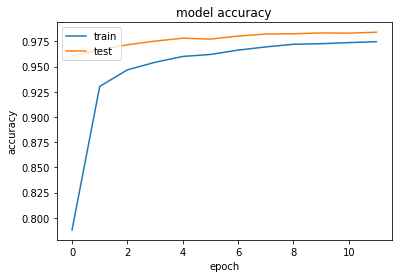

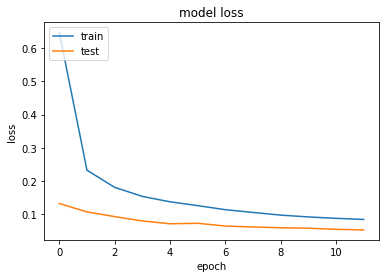

In [8]:
# Accuracy & Epochs

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Loss & Epochs

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [9]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.05192504942978267
Test accuracy: 0.984


<h3> Outputs From Tensorboard </h3>

<h5>Accuracy Maps</h5>

![Accuracy](img/acc.png)
![Accuracy Values](img/accval.png)

<h5>Loss Map</h5>

![title](img/loss.png)
![title](img/lossval.png)

<h4> All Weights Histogram </h4>

![title](img/allweights.png)

<h4> Network Architecture </h4>

![title](img/arch.png)